In [47]:
import numpy as np
import _pickle as pickle
import bcolz

## Transforming GLOVE

In [4]:
path = '/data/glove/'
res_path = path+'results/'

In [39]:
with open(path+ 'glove.6B.50d.txt', 'r', encoding='utf8') as f:    
    lines = [line.split() for line in f]

In [40]:
len(lines)

400000

In [45]:
def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()

def get_glove(name):
    with open(path+ 'glove.' + name + '.txt', 'r', encoding='utf8') as f: lines = [line.split() for line in f]
    words = [d[0] for d in lines]
    vecs = np.stack(np.array(d[1:], dtype=np.float32) for d in lines)
    wordidx = {o:i for i,o in enumerate(words)}
    save_array(res_path+name+'.dat', vecs)
    pickle.dump(words, open(res_path+name+'_words.pkl','wb'))
    pickle.dump(wordidx, open(res_path+name+'_idx.pkl','wb'))

In [50]:
get_glove('6B.50d')
get_glove('6B.100d')
get_glove('6B.200d')
get_glove('6B.300d')

## Look at the vectors

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import _pickle as pickle
import bcolz
from sklearn.manifold import TSNE


In [2]:
def load_array(fname):
    return bcolz.open(fname)[:]

In [3]:
def load_glove(loc):
    return (load_array(loc+'.dat'),
        pickle.load(open(loc+'_words.pkl','rb')),
        pickle.load(open(loc+'_idx.pkl','rb')))

In [5]:
vecs, words, wordidx = load_glove(res_path+'6B.50d')
vecs.shape

(400000, 50)

In [6]:
def w2v(w): return vecs[wordidx[w]]

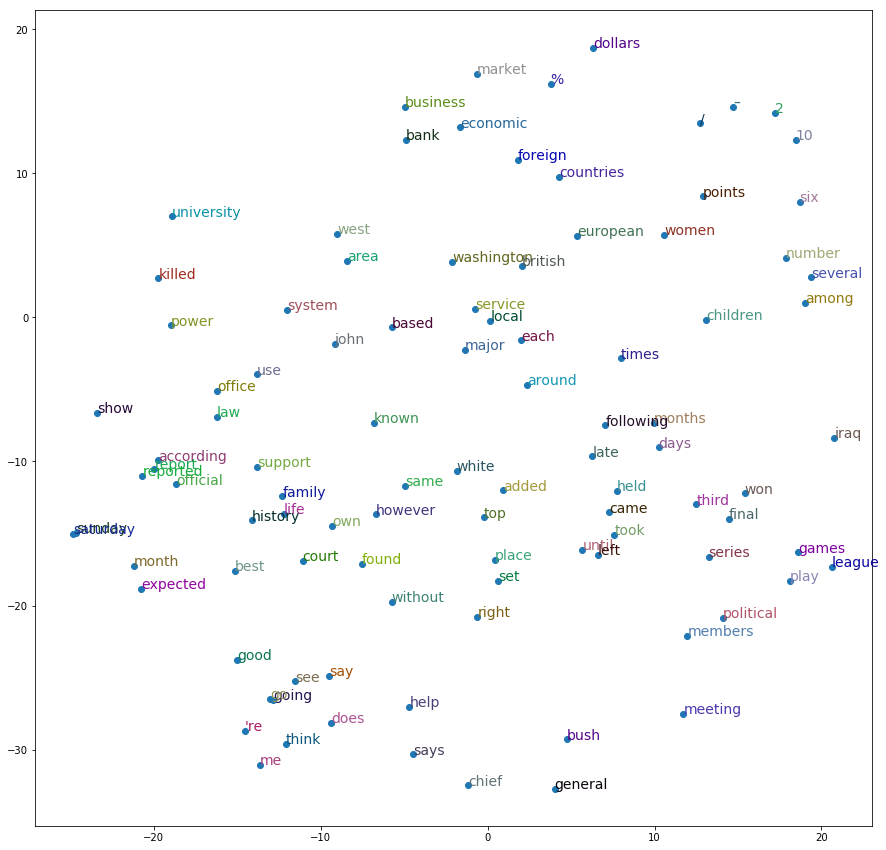

In [21]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(vecs[:500])

start=200; end=300
dat = Y[start:end]
plt.figure(figsize=(15,15))
plt.scatter(dat[:, 0], dat[:, 1])
for label, x, y in zip(words[start:end], dat[:, 0], dat[:, 1]):
    plt.text(x,y,label, color=np.random.rand(3)*0.7,
                 fontsize=14)
plt.show()

In [141]:
def find_closest_match(vector):
    results = []
    for idx in range(400000):
        results.append([np.linalg.norm(vecs[idx] - vector), words[idx]])
    print(np.array(sorted(results))[:10])

In [144]:
find_closest_match(w2v('boat'))

[['0.0' 'boat']
 ['2.24307' 'boats']
 ['2.6283' 'ship']
 ['2.84073' 'vessel']
 ['2.93919' 'aboard']
 ['2.9506' 'sail']
 ['3.25548' 'ferry']
 ['3.31295' 'barge']
 ['3.33518' 'sailing']
 ['3.43142' 'freighter']]
